In [1]:
from random import random, choice
from agents import SarsaAgent, QAgent
from gridworld import CliffWalk,CliffWalk2
from gym import Env
import gym

from utils import greedy_policy, learning_curve, str_key

In [2]:
env = CliffWalk()
env.reset()
env.render()

True

In [3]:


q_agent = QAgent(env, capacity = 10000)
sarsa_agent = SarsaAgent(env, capacity = 10000)

sarsa_sta = sarsa_agent.learning(display = False,
                                 max_episode_num = 10000, 
                                 epsilon = 0.1, 
                                 decaying_epsilon = False)
q_sta = q_agent.learning(display = False,
                         max_episode_num = 10000,
                         epsilon = 0.1, 
                         decaying_epsilon = False)

100%|██████████| 10000/10000 [00:04<00:00, 2464.19it/s]


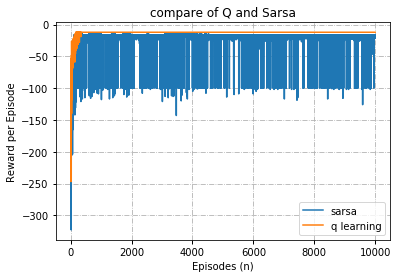

In [4]:
n = 4 # 去掉早期n个奖励过低的Episode
data = sarsa_sta[2][n:], sarsa_sta[1][n:], q_sta[1][n:] 
learning_curve(data, x_index = 0, y1_index = 1, y2_index = 2,
               title="compare of Q and Sarsa", x_name = "Episodes (n)", y_name = "Reward per Episode",
               y1_legend = "sarsa", y2_legend = "q learning")

In [5]:
sarsa_agent.learning_method(display=True)
q_agent.learning_method(display=True)

episode 10000   17 steps,total reward:-16.00  
episode 10000   13 steps,total reward:-12.00  


(13, -12)

In [6]:
env.close()
sarsa_agent.last_episode_detail()
q_agent.last_episode_detail()

detail of (episode 10000   17 steps,total reward:-16.00  ):
step0     s:0   a:2   r:-1   is_end:0     s1:12 
step1     s:12  a:2   r:-1   is_end:0     s1:24 
step2     s:24  a:2   r:-1   is_end:0     s1:36 
step3     s:36  a:1   r:-1   is_end:0     s1:37 
step4     s:37  a:1   r:-1   is_end:0     s1:38 
step5     s:38  a:1   r:-1   is_end:0     s1:39 
step6     s:39  a:1   r:-1   is_end:0     s1:40 
step7     s:40  a:1   r:-1   is_end:0     s1:41 
step8     s:41  a:1   r:-1   is_end:0     s1:42 
step9     s:42  a:1   r:-1   is_end:0     s1:43 
step10    s:43  a:1   r:-1   is_end:0     s1:44 
step11    s:44  a:1   r:-1   is_end:0     s1:45 
step12    s:45  a:1   r:-1   is_end:0     s1:46 
step13    s:46  a:1   r:-1   is_end:0     s1:47 
step14    s:47  a:3   r:-1   is_end:0     s1:35 
step15    s:35  a:3   r:-1   is_end:0     s1:23 
step16    s:23  a:3   r:0    is_end:1     s1:11 
detail of (episode 10000   13 steps,total reward:-12.00  ):
step0     s:0   a:2   r:-1   is_end:0     s1:12

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def xy2state(x, y):
    return str(y*12+x)

def str_key(s, a):
    '''根据横坐标，纵坐标和行为生成键
    '''
    return str(s)+"_"+str(a)
    
def print_q(agent):
    '''打印输出agent的价值
    '''
    for y in range(4):
        for x in range(12):
            for a in range(4):
                key = str_key(xy2state(x,y),a)
                print("{}_{}_{}:{}".format(x,y,a,agent.Q.get(key,0)))
                
def show_q(agent):
    '''绘制agent学习得到的Q值，以图片的形式，每一个位置用3*3的小方格表示，
    中间小方格表示该状态的价值，左右上下四个小方格分别表示相应行为的价值，
    四个角上的数据暂时没有意义。
    '''
    V = np.zeros((4*3,12*3))
    for y in range(4):
        for x in range(12):
            max_qsa = -float('inf')
            for a in range(4): # 0-3 分别为 左 右 上 下
                key = str_key(xy2state(x,y),a)
                qsa = agent.Q.get(key,0)
                if a == 0: V[3*y+1, 3*x+1-1] = qsa
                if a == 1: V[3*y+1, 3*x+1+1] = qsa
                if a == 2: V[3*y+1+1, 3*x+1] = qsa
                if a == 3: V[3*y+1-1, 3*x+1] = qsa
                if qsa > max_qsa: max_qsa = qsa
            V[3*y+1, 3*x+1] = max_qsa
    plt.imshow(V, cmap=plt.cm.gray, interpolation=None, origin="lower", extent=[0, 12, 0, 3])

In [ ]:
show_q(sarsa_agent)
def value_of(agent, s):
    '''以最大行为价值作为某一状态的价值
    '''
    A, Q = agent.A, agent.Q
    max_q = -float('inf')
    for a in A:
        cur_q = Q.get(str_key(s,a),0)
        if cur_q > max_q:
            max_q = cur_q
    return max_q
# 比较坐标(0,0)和(0,3)两处位置的价值大小，判断sarsa学习得到的两处是左上方的价值较大
def print_v(agent, x, y):
    print("{}:value of ({},{}):{}".format(agent.__class__.__name__,x,y,value_of(agent,xy2state(x,y))))

print_v(sarsa_agent, 1,1) # 在(0,1)处右转价值
print_v(sarsa_agent, 0,2) # 在(0,1)处向上价值

sarsa 学习在 $ \epsilon $ - greedy 策略下 $\epsilon$ 不衰减 时学习到的路线是从上方远离悬崖的地方行走

$$J = -\sum_{3}^{2}{ad} + \frac{2}{0} $$

In [ ]:
show_q(q_agent)
print_v(q_agent, 1,1) # 在(0,1)处右转价值
print_v(q_agent, 0,2) # 在(0,1)处向上价值